# Prescriptive K-means algorithm

In [2]:
using CSV, DataFrames, Statistics, Distributions

In [2]:
train = CSV.read("utilities_s1_d1_train_v2.csv")
test = CSV.read("utilities_s1_d1_test_v2.csv")

,Reduced.relapse...No.adverse.effect,Reduced.relapse...Non.serious.adverse.effect.only
,Float64,Float64
1,0.856235,0.826698
2,0.963721,0.909316
3,0.997923,0.994024
4,0.967101,0.8241
5,0.996436,0.929952
6,0.890037,0.85606
7,0.812363,0.690297
8,0.978721,0.839072
9,0.99691,0.89582


In [3]:
using Pkg
Pkg.add("Clustering")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %==========>                              ]  23.0 %]  45.9 %============================>            ]  69.0 %]  91.8 % Resolving package versions...
 Installed FFMPEG ─────── v0.2.4
 Installed OffsetArrays ─ v0.11.3
 Installed QuadGK ─────── v2.2.0
 Installed MacroTools ─── v0.5.3
 Installed GLM ────────── v1.3.5
 Installed Optim ──────── v0.19.6
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [c87230d0] ↑ FFMPEG v0.2.3 ⇒ v0.2.4
  [38e38edf] ↑ GLM v1.3.4 ⇒ v1.3.5
  [1914dd2f] ↑ MacroTools v0.5.2 ⇒ v0.5.3
  [6fe1bfb0] ↑ OffsetArrays v0.11.2 ⇒ v0.11.3
  [429524aa] ↑ Optim v0.19.5 ⇒ v0.19.6
  [1fd47b50] ↑ QuadGK v2.1.1 ⇒ v2.2.0
  Building FFMPEG → `~/.julia/packages/FFMPEG/guN1x/deps/build.log`


In [4]:
using Clustering

In [5]:
M_train = convert(Matrix, train[:,1:56])'
M_test = convert(Matrix, test[:,1:56])'

56×3000 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.856235   0.963721   0.997923   …  0.901277    0.969545   0.907082 
 0.826698   0.909316   0.994024      0.892024    0.862116   0.827107 
 0.0604407  0.111133   0.0973145     0.168176    0.244606   0.014268 
 0.722798   0.681748   0.763534      0.645286    0.79779    0.691304 
 0.0160475  0.0413554  0.0874263     0.00607397  0.0699387  0.0140498
 0.497456   0.453693   0.345033   …  0.245087    0.611217   0.12665  
 0.722798   0.681748   0.763534      0.645286    0.79779    0.691304 
 0.0604407  0.111133   0.0973145     0.168176    0.244606   0.014268 
 0.655059   0.576713   0.744305      0.470594    0.721609   0.50668  
 0.722798   0.681748   0.763534      0.645286    0.79779    0.691304 
 0.0160475  0.0413554  0.0874263  …  0.00607397  0.0699387  0.0140498
 0.632719   0.541984   0.600359      0.364427    0.682134   0.370703 
 0.722798   0.681748   0.763534      0.645286    0.79779    0.691304 
 ⋮                               

In [6]:
train_means = kmeans(M_train, 100 ; maxiter=200)

KmeansResult{Array{Float64,2},Float64,Int64}([0.8236933530418222 0.9509568372429161 … 0.9740964207368132 0.9395247535166138; 0.6853963017586747 0.9114211724754511 … 0.9435576409857052 0.8801903475207666; … ; 0.20295744385020828 0.28757821605188216 … 0.29835667383839126 0.15958798986813014; 0.39961530287697183 0.6887899946256469 … 0.7604910868309154 0.5023857652800954], [24, 53, 72, 67, 85, 57, 35, 76, 89, 59  …  8, 25, 90, 11, 32, 13, 57, 93, 88, 53], [0.051311477112992776, 0.048779684271931245, 0.07167223796061961, 0.07254089009234121, 0.20480415832076204, 0.10141531588563524, 0.1447316713585991, 0.051426942613369775, 0.16713226223112798, 0.12872633097771846  …  0.09168207329617672, 0.08918880574594112, 0.15987076379801124, 0.06776453810316951, 0.09081100999451586, 0.11071186875777528, 0.0897358974827469, 0.12414039930546039, 0.053538702608136646, 0.11126328366719207], [60, 74, 66, 73, 82, 49, 69, 112, 80, 53  …  79, 64, 106, 85, 120, 136, 83, 21, 36, 83], [60, 74, 66, 73, 82, 49, 69,

In [7]:
train_assignement = assignments(train_means)
centers_train = train_means.centers

56×100 Array{Float64,2}:
 0.823693   0.950957  0.946221  0.959327   …  0.961864  0.974096   0.939525 
 0.685396   0.911421  0.892724  0.9105        0.918506  0.943558   0.88019  
 0.144875   0.247482  0.167487  0.0675289     0.471058  0.185511   0.0953783
 0.456446   0.773642  0.693008  0.716363      0.821748  0.857423   0.689977 
 0.0579272  0.18339   0.118286  0.0309751     0.354676  0.0912963  0.0407211
 0.278744   0.440017  0.257545  0.168117   …  0.614941  0.387502   0.238429 
 0.456446   0.773642  0.693008  0.716363      0.821748  0.857423   0.689977 
 0.144875   0.247482  0.167487  0.0675289     0.471058  0.185511   0.0953783
 0.409466   0.716214  0.524872  0.516653      0.774803  0.798465   0.584193 
 0.456446   0.773642  0.693008  0.716363      0.821748  0.857423   0.689977 
 0.0579272  0.18339   0.118286  0.0309751  …  0.354676  0.0912963  0.0407211
 0.351158   0.645951  0.356534  0.274351      0.715087  0.727669   0.333541 
 0.456446   0.773642  0.693008  0.716363      0.821

In [8]:
function center_affection(data_points, centers_f)
    m = size(data_points)[2]
    n_clusters = size(centers_f)[2]
    
    closest_center = [1 for i in 1:m]
    
    for k in 1:m
        
        distance = sum((data_points[:,k].-centers_f[:,1]).^2)

        for i in 2:n_clusters
            
            new_distance = sum((data_points[:,k].-centers_f[:,i]).^2)
            
            if (distance > new_distance)
                closest_center[k] = i 
                distance = new_distance
            end
        end
    end
    
    return(closest_center)
end

center_affection (generic function with 1 method)

In [9]:
test_assignement = center_affection(M_test,centers_train)

3000-element Array{Int64,1}:
  5
 72
 16
 67
 24
 61
 18
  9
 22
 24
 48
 94
  3
  ⋮
 77
 63
 57
 18
 22
 22
 16
 48
  5
 78
 83
 21

In [10]:
data_train_assignement = zeros(7000)
data_test_assignement = zeros(3000)
for i in 1:7000
    data_train_assignement[i] = train_assignement[i]
end
for i in 1:3000
    data_test_assignement[i] = test_assignement[i]
end

In [11]:
data_train_assignement = DataFrame( assignement = data_train_assignement)
data_test_assignement = DataFrame( assignement = data_test_assignement)

,assignement
,Float64
1,5.0
2,72.0
3,16.0
4,67.0
5,24.0
6,61.0
7,18.0
8,9.0
9,22.0


In [12]:
train_assignement = hcat(train, data_train_assignement)
test_assignement = hcat(test, data_test_assignement)

,Reduced.relapse...No.adverse.effect,Reduced.relapse...Non.serious.adverse.effect.only
,Float64,Float64
1,0.856235,0.826698
2,0.963721,0.909316
3,0.997923,0.994024
4,0.967101,0.8241
5,0.996436,0.929952
6,0.890037,0.85606
7,0.812363,0.690297
8,0.978721,0.839072
9,0.99691,0.89582


In [13]:
function most_common(dataf)
    n = length(dataf)
    count = zeros(3)
    for i in 1:n
        count[dataf[i]] = count[dataf[i]]+1
    end
    count_max = maximum(count)
    ind = findall(a->a==count_max, count)
    return(ind[1])
end

most_common (generic function with 1 method)

In [14]:
function prescription(test_f, train_f)
    nrow = size(test_f)[1]
    prescribed_treatment = zeros(nrow)
    for i in 1:nrow
        cluster = test_f[i, :assignement]
        train_filter = filter(train_f -> train_f[:assignement] == cluster, train_f)
        prescribed_treatment[i] = most_common(train_filter[:,:best_treatment])
    end
    return(prescribed_treatment)
end

prescription (generic function with 1 method)

In [15]:
function misclassification_score(predicted_val_f, actual_val_f)
    n = length(predicted_val_f)
    classified_f = 0
    for i in 1:n
        if (predicted_val_f[i]==actual_val_f[i])
            classified_f = classified_f + 1
        end
    end
    score_f = classified_f/n
    return(score_f)
end

misclassification_score (generic function with 1 method)

In [16]:
function prescription_performance(test_f, train_f, k)
    #sizes
    n1 = size(test_f)[1]
    n2 = size(train_f)[1]
    
    #converting the data
    M_train_f = convert(Matrix, train_f[:,1:56])'
    M_test_f = convert(Matrix, test_f[:,1:56])'
    
    #Calculating the clusters' centers
    train_means_f = kmeans(M_train_f, k ; maxiter=200)
    train_assignement_f = assignments(train_means_f)
    centers_train_f = train_means_f.centers
    
    #Affecting clusters to test patients
    test_assignement_f = center_affection(M_test_f,centers_train_f)
    
    data_train_assignement_f = zeros(n2)
    data_test_assignement_f = zeros(n1)
    
    for i in 1:n2
        data_train_assignement_f[i] = train_assignement_f[i]
    end
    for i in 1:n1
        data_test_assignement_f[i] = test_assignement_f[i]
    end
    
    data_train_assignement_f = DataFrame( assignement = data_train_assignement_f)
    data_test_assignement_f = DataFrame( assignement = data_test_assignement_f)
    
    #New Dataframe with assignamenct
    train_assignement_f = hcat(train_f, data_train_assignement_f)
    test_assignement_f = hcat(test_f, data_test_assignement_f)

    predicted_val = prescription(test_assignement_f, train_assignement_f)
    actual_val = test_assignement_f[:,:best_treatment]
    
    return(misclassification_score(predicted_val, actual_val))
    
end

prescription_performance (generic function with 1 method)

In [32]:
prescription_performance(test, train, 20)

0.637

In [60]:
seq_k = [5:5:100;]
accuracy_k = [0. for i in 1:length(seq_k)]
for i in 1:length(seq_k)
    accuracy_k[i] = prescription_performance(test, train, seq_k[i])
end

In [62]:
accuracy_k

20-element Array{Float64,1}:
 0.637             
 0.637             
 0.637             
 0.637             
 0.637             
 0.637             
 0.637             
 0.6363333333333333
 0.637             
 0.6356666666666667
 0.6376666666666667
 0.6403333333333333
 0.6406666666666667
 0.6353333333333333
 0.6403333333333333
 0.6343333333333333
 0.6346666666666667
 0.6403333333333333
 0.636             
 0.639             

### Evaluating the performance evolution with Data perturbation

In [50]:
means_global = CSV.read("data/means_global.csv", header = true);
sds_global= CSV.read("data/sds_global.csv", header = true);

In [73]:
seq_pertubation = [0:0.1:3;]
accuracy_knn_o1 = zeros(length(seq_pertubation))
accuracy_knn_o2 = zeros(length(seq_pertubation))
accuracy_knn_o3 = zeros(length(seq_pertubation))
k = 0
for p in seq_pertubation
    k = k+1
    test_perturbed = deepcopy(test)
    m = size(test_perturbed)[2]
    n = size(test_perturbed)[1]
    
    for i in 1:(m-1)
           distrib = Normal(means_global[m-i][1], p*sds_global[m-i][1] )
           perturb = (means_global[m-i][1] .- rand(distrib, n))
           data_perturbed = test_perturbed[:,m-i] .+ perturb
           test_perturbed[:,m-i] = data_perturbed
    end
    accuracy_knn_o1[k] = prescription_performance(test_perturbed, train, 100)
    accuracy_knn_o2[k] = prescription_performance(test_perturbed, train, 50)
    accuracy_knn_o3[k] = prescription_performance(test_perturbed, train, 20)
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[73]:13
└ @ Core ./In[73]:13
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[73]:13
└ @ Core ./In[73]:13
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[73]:14
└ @ Core ./In[73]:14
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[73]:16
└ @ Core ./In[73]:16


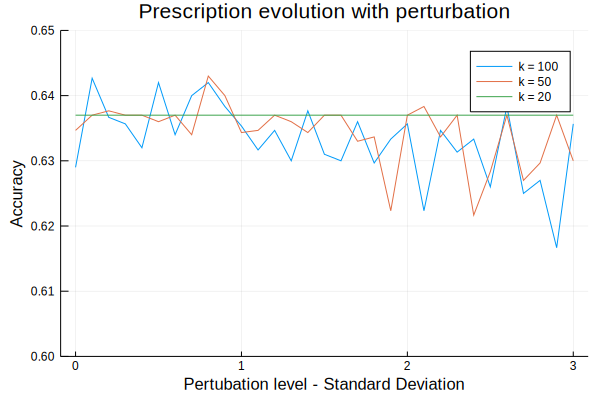

In [75]:
using Plots
gr()
plot(seq_pertubation, accuracy_knn_o1, title = "Prescription evolution with perturbation", xlabel = "Pertubation level - Standard Deviation",ylabel = "Accuracy", label = "k = 100")
plot!(seq_pertubation, accuracy_knn_o2, title = "Prescription evolution with perturbation", xlabel = "Pertubation level - Standard Deviation",ylabel = "Accuracy", label = "k = 50")
plot!(seq_pertubation, accuracy_knn_o3, title = "Prescription evolution with perturbation", xlabel = "Pertubation level - Standard Deviation",ylabel = "Accuracy", label = "k = 20")
ylims!((0.6,0.65))